# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

In [9]:
dados_encoded = pd.read_csv('dados_limpos.csv')
dados_encoded.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,1,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0


In [17]:
dados_encoded.columns

Index(['Unnamed: 0', 'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [44]:
#Separando as variáveis explicativas da target

y = dados_encoded['mau']

In [45]:
X = dados_encoded.drop('mau', axis=1)

In [46]:
#Separando entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [47]:
# 1 - Defina um objeto com a função da árvore de decisão vista em aula.

clf_dt = DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier()

In [51]:
# 2 - Treine o modelo com os dados que você separou para treinamento

clf_dt = clf_dt.fit(X_train,y_train)
clf_dt

DecisionTreeClassifier()

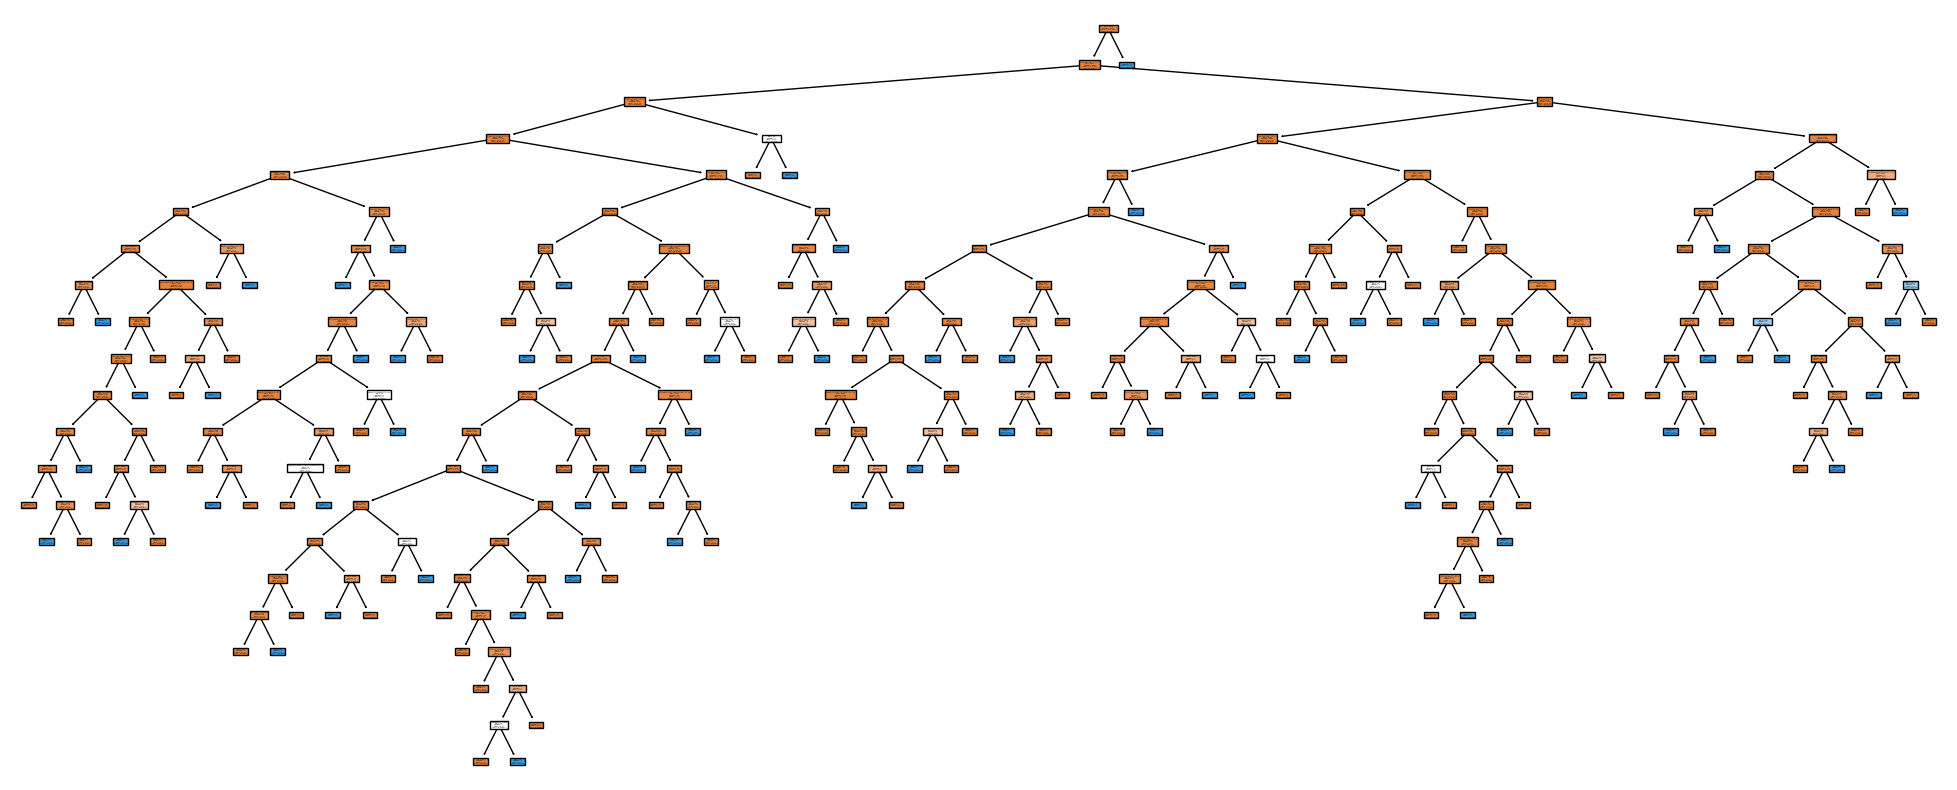

In [54]:
# 3 - Visualize a árvore. Talvez você queira aumentar um pouco a figura.

plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns.tolist());
plt.show()

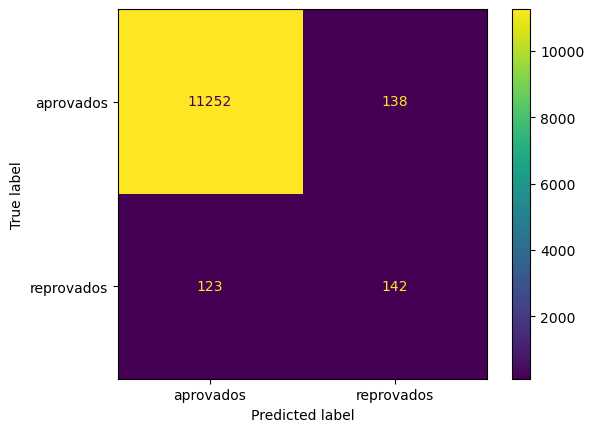

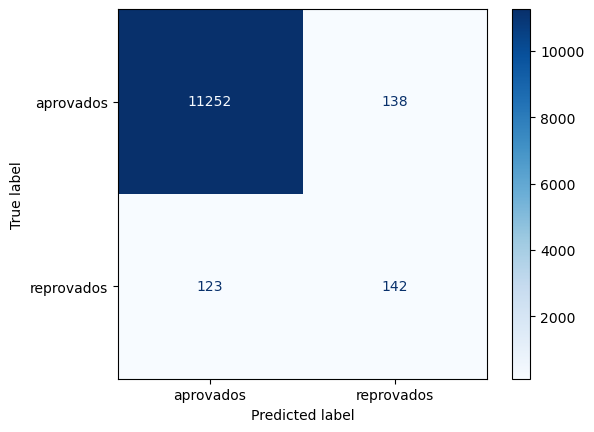

In [55]:
# 4 - Produza uma visualização da matriz de classificação (ou matriz de confusão) - 
# coloque os rótulos como "aprovados" e "reprovados" pois afinal de contas, 
# são essas as decisões que se podem tomar com propostas de crédito.

cm = ConfusionMatrixDisplay.from_estimator(clf_dt, X_test, y_test, display_labels=['aprovados', 'reprovados'])

# Plotando a matriz de confusão
cm.plot(cmap=plt.cm.Blues)

# Mostrando a visualização
plt.show()

In [62]:
# 5 - Calcule a acurácia na base de treinamento

y_pred_train = clf_dt.predict(X_train) # Fazer as previsões na base de treinamento

acuracia = accuracy_score(y_train, y_pred_train) # Calcular a acurácia comparando as previsões com os valores reais

print(f"A acurácia na base de treinamento foi de {acuracia:.2f}")

A acurácia na base de treinamento foi de 1.00


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [60]:
# 1 - Classifique a base de teste de acordo com a árvore que você treinou no item 2.

y_pred_test = clf_dt.predict(X_test)

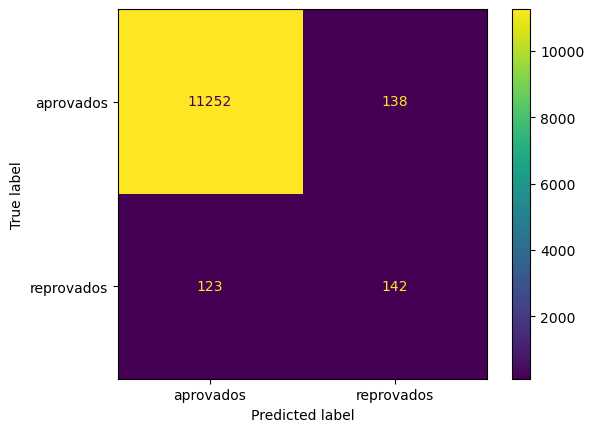

In [61]:


# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test) 
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"]).plot() 

# Gerar o gráfico
plt.show()

In [65]:
# 3 - Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

# Calcular a acurácia da base de teste

acuracia_test = accuracy_score(y_test, y_pred_test)
print(acuracia_test)



# Calcular a acurácia da base de treinamento

y_pred_train = clf_dt.predict(X_train) 

acuracia_train = accuracy_score(y_train, y_pred_train)
print(acuracia_train) 

0.9776061776061776
1.0


In [67]:
# 4 - Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
# Use o random_state = 123. Avalie a matriz de classificação. 
# Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

# Criando a nova árvore
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123) 

# Treinar a árvore
nova_arvore.fit(X_train, y_train)

# Fazer as previsões na base de teste
y_pred_nova = nova_arvore.predict(X_test)

# Gerar o relatório de classificação
relatorio = classification_report(y_test, y_pred_nova)
print(relatorio)

# Calcular a distribuição da predição
distribuicao = pd.Series(y_pred_nova).value_counts()
print(distribuicao) 

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     11390
        True       0.91      0.45      0.60       265

    accuracy                           0.99     11655
   macro avg       0.95      0.72      0.80     11655
weighted avg       0.99      0.99      0.98     11655

False    11524
True       131
dtype: int64


In [70]:
# 5 - Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

# Criar um array com todos os valores 'bom'
y_pred_todos_bons = np.repeat('bom', len(y_test))

# Calcular a acurácia entre esse array e o y_test
acuracia_todos_bons = accuracy_score(y_test, y_pred_todos_bons)

# Mostrar o valor da acurácia
print(acuracia_todos_bons)

# Comparar com a acurácia do seu modelo
print(acuracia_test)

0.0
0.9776061776061776


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:226: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
